# Homework 04
For questions 2-6, please use hw4.zip, which contains a data base of patient/hopsital data.

## Question 1
*For this question, you can either import these tables into R and do each join, or create the tables we expect to see in a Markdown cell.*   
Please see the tables below.  

In [ ]:
demo<- read.csv(

In [6]:
library(tidyverse)

table_a <- tibble(
  SKU = c(102345, 104567, 108912, 109876, 112233),
  Fruit = c("Apple", "Orange", "Mango", "Blueberry", "Watermelon"),
  Color = c("Red", "Orange", "Yellow", "Blue", "Green"),
  Price = c(1.20, 1.40, 1.70, 3.50, 4.40),
  In_Stock = c("Yes", "Yes", "No", "Yes", "No")
)

table_b <- tibble(
  SKU = c(102345, 105432, 106789, 104567, 107654),
  Fruit = c("Apple", "Banana", "Grape", "Orange", "Pear"),
  Color = c("Red", "Yellow", "Purple", "Orange", "Green"),
  Sale_Price = c(1.00, 0.50, 2.00, 1.20, 1.10),
  Number_in_Stock = c(50, 120, 0, 75, 0)
)

print(table_a)
print(table_b)

# A tibble: 5 × 5
     SKU Fruit      Color  Price In_Stock
   <dbl> <chr>      <chr>  <dbl> <chr>   
1 102345 Apple      Red      1.2 Yes     
2 104567 Orange     Orange   1.4 Yes     
3 108912 Mango      Yellow   1.7 No      
4 109876 Blueberry  Blue     3.5 Yes     
5 112233 Watermelon Green    4.4 No      
# A tibble: 5 × 5
     SKU Fruit  Color  Sale_Price Number_in_Stock
   <dbl> <chr>  <chr>       <dbl>           <dbl>
1 102345 Apple  Red           1                50
2 105432 Banana Yellow        0.5             120
3 106789 Grape  Purple        2                 0
4 104567 Orange Orange        1.2              75
5 107654 Pear   Green         1.1               0


What would the result be if you did...  
a) Left join
- Keeps all rows from table A, adds matching columns from table B
b) Right join
- Keeps all rows from table B, adds matching columns from table A
c) Inner join
- Adds columns from both the tavles, but only includers rows that match for both the tables
d) Full join  
- Adds all rows and columns from both the tables. 
e) Semi join 
Keeps rows from table_a where SKU exists in table_b, but doesn’t bring in columns from table_b.
f) Anti join  
Keeps rows from table_a where SKU does NOT exist in table_b.

## Question 2
Inspect the data sets in our database!  
a) Import them.
b) Check out the columns and their variable types using one of R's tibble summary functions.

In [2]:
a)
demographic_data <- read_csv("HW4-1/demographics.csv")
full_data <- read_csv("HW4-1/full.csv")
hospitals_data <- read_csv("HW4-1/hospitals.csv")
patient_names_data <- read_csv("HW4-1/patient_names.csv")
treatment_info_data <- read_csv("HW4-1/treatment_info.csv")

Rows: 35 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): patient_id, gender, race, ethnicity
dbl (1): age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): patient_id, name, gender, race, ethnicity, condition, treatment, ...
dbl   (2): age, patient_zipcode
date  (2): admission_date, release_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): hospital_id, hospital_name, hospital_address, hospital_city, hospit...
dbl (1): hospital_zip_code

ℹ Use `spec()` to retrie

In [8]:
library(tidyverse)
glimpse(demographic_data)
glimpse(full_data)
glimpse(hospitals_data)
glimpse(patient_names_data)
glimpse(treatment_info_data)


Rows: 35
Columns: 5
$ patient_id <chr> "P001", "P002", "P003", "P004", "P005", "P006", "P007", "P0…
$ age        <dbl> 51, 73, 49, 6, 64, 38, 36, 22, 20, 85, 61, 23, 54, 22, 29, …
$ gender     <chr> "Male", "Male", NA, "Other", "Other", "Other", "Female", "O…
$ race       <chr> "Hispanic", "Hispanic", "White", "White", "White", "Hispani…
$ ethnicity  <chr> "Non-Hispanic", "Non-Hispanic", "Non-Hispanic", "Non-Hispan…
Rows: 35
Columns: 16
$ patient_id      <chr> "P001", "P002", "P003", "P004", "P005", "P006", "P007"…
$ name            <chr> "Mary Hicks", "Matthew Christensen", "Lisa Graham", "G…
$ age             <dbl> 51, 73, 49, 6, 64, 38, 36, 22, 20, 85, 61, 23, 54, 22,…
$ gender          <chr> "Male", "Male", NA, "Other", "Other", "Other", "Female…
$ race            <chr> "Hispanic", "Hispanic", "White", "White", "White", "Hi…
$ ethnicity       <chr> "Non-Hispanic", "Non-Hispanic", "Non-Hispanic", "Non-H…
$ condition       <chr> "Cancer", "Heart Disease", "Asthma", "Heart Disease", …

## Question 3
Using the `full.csv` data set from our database, **pivot longer** by making all of the variables the same type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of observations per `patient ID`/`name`. (*Hint: We did this in lecture 5!*)  

In [9]:
full_long <- pivot_longer(full_data, age:patient_zipcode,
    names_to = "property",
    values_to = "observation",
    values_transform = function(x) ifelse(is.na(x), NA, as.character(x)))
   

#Get a tally for the number of observations per patient ID/name
print(full_long %>%
     group_by(patient_id, name) %>%
     tally() %>%
     arrange(desc(n)))

# A tibble: 35 × 3
# Groups:   patient_id [35]
   patient_id name                    n
   <chr>      <chr>               <int>
 1 P001       Mary Hicks             14
 2 P002       Matthew Christensen    14
 3 P003       Lisa Graham            14
 4 P004       Greg Brown             14
 5 P005       Joshua Baker           14
 6 P006       Wendy Richardson       14
 7 P007       April Sanchez          14
 8 P008       Melinda Moody          14
 9 P009       Dylan Lopez DVM        14
10 P010       Maria Bruce            14
# ℹ 25 more rows


## Question 4
Pivot longer by making one column per data type. Use both `patient_ID` and `name` as ID variables. After pivoting, get a `tally` for number of each type of observation per `patient ID`/`name`.  

**Helpful Hints:**  
1. You're performing 3 seperate pivots with careful column selection then joining them after!  
2. After each pivot, add the code below to create a unique row number:  
```
%>%
group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()
```
3. To greate the tally, add what is below after your grouping statement:   
```
%>%
summarise(
    n_chr  = sum(!is.na(value_chr)),
    n_num  = sum(!is.na(value_num)),
    n_date = sum(!is.na(value_date)),
    .groups = "drop"
```

In [34]:
numeric.long <- full_data %>%
    pivot_longer(
    cols= where(is.numeric),
    names_to = "property",
    values_to = "observation"
    ) %>%
    group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()


In [57]:
character.long <- full_data %>% 
    pivot_longer(               
    cols= where(is.character),
    names_to = "property",
    values_to = "observation", 
    id_cols= c(patient_id, names)
    ) %>%
    group_by(patient_id, name) %>%
    mutate(row = row_number()) %>%
    ungroup()


ERROR: [1m[33mError[39m in `pivot_longer()`:[22m
[1m[22m[33m![39m Arguments in `...` must be used.
[31m✖[39m Problematic argument:
[36m•[39m id_cols = c(patient_id, names)
[36mℹ[39m Did you misspell an argument name?


In [37]:
library(lubridate)
date.long <- full_data %>%
    pivot_longer(
    cols= where(~inherits(.x, "Date")),
    names_to = "property",
    values_to = "observation"
    
    )%>%
group_by(patient_id, name) %>%
  mutate(row = row_number()) %>%
  ungroup()

In [39]:
print(numeric.long)
print(date.long)

# A tibble: 70 × 17
   patient_id name         gender race  ethnicity condition treatment department
   <chr>      <chr>        <chr>  <chr> <chr>     <chr>     <chr>     <chr>     
 1 P001       Mary Hicks   Male   Hisp… Non-Hisp… Cancer    Chemothe… Oncology  
 2 P001       Mary Hicks   Male   Hisp… Non-Hisp… Cancer    Chemothe… Oncology  
 3 P002       Matthew Chr… Male   Hisp… Non-Hisp… Heart Di… Bypass S… Cardiology
 4 P002       Matthew Chr… Male   Hisp… Non-Hisp… Heart Di… Bypass S… Cardiology
 5 P003       Lisa Graham  NA     White Non-Hisp… Asthma    Inhaler … Pediatrics
 6 P003       Lisa Graham  NA     White Non-Hisp… Asthma    Inhaler … Pediatrics
 7 P004       Greg Brown   Other  White Non-Hisp… Heart Di… Bypass S… Cardiology
 8 P004       Greg Brown   Other  White Non-Hisp… Heart Di… Bypass S… Cardiology
 9 P005       Joshua Baker Other  White Non-Hisp… Heart Di… Bypass S… Cardiology
10 P005       Joshua Baker Other  White Non-Hisp… Heart Di… Bypass S… Cardiology
# ℹ 60 m

## Question 5
Match patient names to the name of the hospital they were treated at.  
*Hint: You'll need `patient_names.csv` and `hospitals.csv`.*

In [51]:
patient_hospitals_data<- patient_names_data %>%
left_join(hospitals_data %>% select(hospital_id, hospital_name),
by = "hospital_id")
print(patient_hospitals_data)

# A tibble: 35 × 5
   patient_id name                hospital_id condition_id hospital_name        
   <chr>      <chr>               <chr>       <chr>        <chr>                
 1 P001       Mary Hicks          H1          C            Greenwood Medical Ce…
 2 P002       Matthew Christensen H5          HD           Mountainview Clinic  
 3 P003       Lisa Graham         H5          A            Mountainview Clinic  
 4 P004       Greg Brown          H3          HD           Sunrise Health       
 5 P005       Joshua Baker        H1          HD           Greenwood Medical Ce…
 6 P006       Wendy Richardson    H3          A            Sunrise Health       
 7 P007       April Sanchez       H5          A            Mountainview Clinic  
 8 P008       Melinda Moody       H3          S            Sunrise Health       
 9 P009       Dylan Lopez DVM     H1          A            Greenwood Medical Ce…
10 P010       Maria Bruce         H5          F            Mountainview Clinic  
# ℹ 25 mo

## Question 6

Using joins, create a table that shows `patient_id`, `name`, `age`, `gender`, `condition`, and `treatment`.   
*Hint: You'll need `patient_names.csv`, `demographics.csv`, and `treatment_info.csv`.*

In [63]:
patient_demo_data <- patient_names_data %>%
left_join(demographic_data%>% select(patient_id, age, gender), by = "patient_id")
print(patient_demo_data)

# A tibble: 35 × 6
   patient_id name                hospital_id condition_id   age gender
   <chr>      <chr>               <chr>       <chr>        <dbl> <chr> 
 1 P001       Mary Hicks          H1          C               51 Male  
 2 P002       Matthew Christensen H5          HD              73 Male  
 3 P003       Lisa Graham         H5          A               49 NA    
 4 P004       Greg Brown          H3          HD               6 Other 
 5 P005       Joshua Baker        H1          HD              64 Other 
 6 P006       Wendy Richardson    H3          A               38 Other 
 7 P007       April Sanchez       H5          A               36 Female
 8 P008       Melinda Moody       H3          S               22 Other 
 9 P009       Dylan Lopez DVM     H1          A               20 Male  
10 P010       Maria Bruce         H5          F               85 Other 
# ℹ 25 more rows


In [65]:
patient_demo_treat_data <- patient_demo_data %>%
left_join(treatment_info_data%>% select(condition_id, condition, treatment), by = "condition_id")
print(patient_demo_treat_data)

# A tibble: 35 × 8
   patient_id name     hospital_id condition_id   age gender condition treatment
   <chr>      <chr>    <chr>       <chr>        <dbl> <chr>  <chr>     <chr>    
 1 P001       Mary Hi… H1          C               51 Male   Cancer    Chemothe…
 2 P002       Matthew… H5          HD              73 Male   Heart Di… Bypass S…
 3 P003       Lisa Gr… H5          A               49 NA     Asthma    Inhaler …
 4 P004       Greg Br… H3          HD               6 Other  Heart Di… Bypass S…
 5 P005       Joshua … H1          HD              64 Other  Heart Di… Bypass S…
 6 P006       Wendy R… H3          A               38 Other  Asthma    Inhaler …
 7 P007       April S… H5          A               36 Female Asthma    Inhaler …
 8 P008       Melinda… H3          S               22 Other  Stroke    Rehabili…
 9 P009       Dylan L… H1          A               20 Male   Asthma    Inhaler …
10 P010       Maria B… H5          F               85 Other  Fracture  Surgery  
# ℹ 25 mo

## Question 7
Let's revisit the NOFORC workshop.  
Below is what we completed in class on 9/9.  
**Please note: This contains the skimr library. Make sure you install that package! See the link for instructions: https://github.com/rjenki/BIOS512#adding-packages-to-installr-later.**  

In [ ]:
# Load UFO sightings data from a GitHub CSV
df <- read_csv("https://raw.githubusercontent.com/Vincent-Toups/bios512/refs/heads/main/nuforc_workshop/nuforc_sightings.csv")

# Read column names
names(df)

# Count the occurrences of each unique 'shape' value
unique_vals <- df$shape %>% table()

# Sort the counts of shapes in descending order and get the names
unique_vals %>% sort(decreasing = T) %>% names()

# Store column names in a vector
column_names <- names(df)

# Total number of rows in the dataset
n_total <- nrow(df)

# Loop over each column to get basic summary stats
for(col in column_names) {
  values <- df[[col]];        # Extract column
  n_na <- sum(is.na(values))  # Count number of NA values
    
  unique_vals <- values %>% table() %>% sort(decreasing = T)  # Count unique values and sort them by frequency
  n_unique <- length(unique_vals)
    
  cat(sprintf("%s:\n", col))  # Print column name
  cat(sprintf("\tnumber of NA values %d (%0.2f %%)\n", n_na, 100*n_na/n_total)) # Print number and percent of NA values
  if(n_unique < 150) cat(sprintf("\t\t%s\n", names(unique_vals) %>% paste(collapse=", "))) # If column has fewer than 150 unique values, print them all
  cat(sprintf("\tnumber of unique values %d (%0.2f %%)\n", length(unique_vals), # Print number and percent of unique values
    100*length(unique_vals)/n_total))
}

# Count number of reports per state and sort ascending
df %>% group_by(state) %>% tally() %>% arrange(n)

# Extract the 'occurred' column as a vector
df %>% pull(occurred)

# Helper function: nth(n) returns a function that extracts the nth element of a vector
nth <- function(n) function(a) a[n]

# Custom function to parse date strings by splitting on - / space : characters
parse_date <- function(s){
                          space_split <- s %>% str_split("[-/ :]")
                          tibble(d1 = Map(nth(1), space_split) %>% as.character(),
                                      d2 = Map(nth(2), space_split) %>% as.character(),
                                      d3 = Map(nth(3), space_split) %>% as.character(),
                                      d4 = Map(nth(4), space_split) %>% as.character(),
                                      d5 = Map(nth(5), space_split) %>% as.character())
                          }

# Apply the parsing function to the 'occurred' column
date_stuff <- parse_date(df %>% pull(occurred))
head(date_stuff, 10)

# Histogram of the second component of the split date (likely month)
ggplot (date_stuff, aes(d2))+ geom_bar() + labs(x = "Month", y = "Count")

# Install and load the skimr package for a nicer summary
library(skimr)

# Quick summary of the dataset
skim_output <- skimr::skim(df)

# Count occurrences for categorical columns
df %>% count(country, sort = TRUE)
df %>% count(state, sort = TRUE)
df %>% count(shape, sort = TRUE)

# Convert 'occurred' and 'reported' to proper date-time format using lubridate
df <- df %>%
  mutate(
  occurred = lubridate::mdy_hm(occurred, quiet = TRUE),
  reported = lubridate::mdy_hm(reported, quiet = TRUE)
  )

# Plot UFO sightings per year
df %>%
  filter(!is.na(occurred)) %>%
  count(year = lubridate::year(occurred)) %>%
  ggplot(aes(year, n)) +
  geom_line() +
    labs(title = "UFO Sightings per Year", x = "Year", y = "Number of Reports")

For the columns that have a low (relative to this dataset, which has ~150,000 observation) number of unique values, create a table that lists these unique values in ascending order.

In [44]:
glimpse(df)

Rows: 156,711
Columns: 11
$ id          <dbl> 191797, 191800, 191799, 191801, 191796, 191697, 192148, 19…
$ link_url    <chr> "https://nuforc.org/sighting/?id=191797", "https://nuforc.…
$ occurred    <chr> "08/31/2025 21:00", "08/31/2025 02:30", "08/30/2025 11:30"…
$ city        <chr> "Kastrup", "El Cajon", "Grand Junction", "El Cajon", "Roch…
$ state       <chr> NA, "CA", "CO", "CA", "England", "NM", "WI", "WI", "AZ", "…
$ country     <chr> "Denmark", "USA", "USA", "USA", "United Kingdom", "USA", "…
$ shape       <chr> "Circle", "Unknown", "Orb", "Unknown", "Circle", "Changing…
$ summary     <chr> "The ufo was traveling at high speeds suddenly stopping an…
$ reported    <chr> "08/31/2025", "08/31/2025", "08/31/2025", "08/31/2025", "0…
$ has_image   <chr> NA, NA, NA, NA, NA, "Y", NA, NA, "Y", NA, NA, "Y", NA, NA,…
$ explanation <chr> NA, "Drone?", NA, "Drone?", NA, "Balloon?", NA, "Planet/St…


In [46]:
unique_counts <- df %>%
  summarise(across(everything(), ~ n_distinct(.))) %>%
  pivot_longer(
    everything(),
    names_to = "column",
    values_to = "n_unique"
  ) %>%
  arrange(n_unique)

unique_counts


column,n_unique
<chr>,<int>
has_image,2
shape,40
explanation,90
country,406
state,976
reported,10759
city,31885
occurred,134473
summary,153833


In [69]:
low_unique_cols <- c("shape", "has_image", "explanation")

low_unique_table <- lapply(low_unique_cols, function(col) {
  tibble(
    column = col,
    value = sort(unique(df[[col]]))
  )
}) %>%
  bind_rows()

low_unique_table


column,value
<chr>,<chr>
shape,changing
shape,Changing
shape,Chevron
shape,cigar
shape,Cigar
shape,circle
shape,Circle
shape,Cone
shape,Cross


## Question 8
Make a plot of number of UFO sightings by state (United States only). You can filter out states that only have one observation.

In [81]:
state_counts <- df %>%
filter(country == "USA") %>%       
group_by(state) %>%
tally(name = "num_sightings") %>%  
filter(num_sightings > 2000) %>%     #note: I made this 2000 to make the plot look better 
arrange(desc(num_sightings))

state_counts

state,num_sightings
<chr>,<int>
CA,16904
FL,8706
WA,7506
TX,6548
NY,6223
PA,5288
AZ,5264
OH,4647
IL,4443


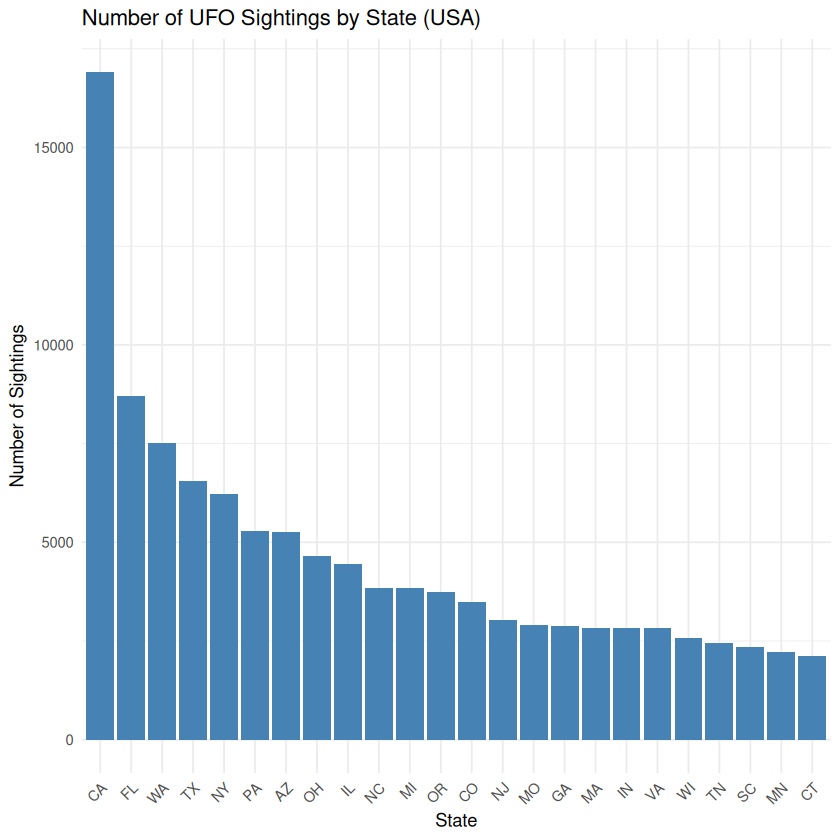

In [80]:
ggplot(state_counts, aes(x = reorder(state, -num_sightings), y = num_sightings)) +
  geom_col(fill = "steelblue") +
  labs(
    title = "Number of UFO Sightings by State (USA)",
    x = "State",
    y = "Number of Sightings"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))